In [1]:
import numpy as np
import os
import h5py
import matplotlib.pyplot as plt
from zipfile import ZipFile
import scipy.misc
import cv2
from PIL import Image
from IPython.display import display
import glob

In [2]:
np.random.seed(0)
plt.rcParams['image.cmap'] = 'gray'

In [3]:
src_parent_path = os.path.join('sets_labels', 'category_wise')
dest_parent_path = os.path.join('sets_labels', 'combined')
categories = os.listdir(src_parent_path)

In [4]:
with h5py.File(os.path.join(dest_parent_path, 'train_set_A.hdf5'), 'w') as h5_writer:
    rows = 0
    for cat in categories:
        h5_fname = os.path.join(src_parent_path, cat, 'partial_train_set.hdf5')
        h5_reader = h5py.File(h5_fname, 'r')
        dset = h5_reader['train_images_A'][:,:,:]
        ds_len = dset.shape[0]
        w = dset.shape[1]
        h = dset.shape[2]
        print(ds_len, w, h)
        if rows == 0:
            h5_writer.create_dataset('train_A', dtype=np.float32, shape=(ds_len, w, h), maxshape=(None, w, h))
            print("Created dataset")
        if (rows + ds_len) <= h5_writer['train_A'][:].shape[0]:
            h5_writer['train_A'][rows:rows+ds_len, :, :] = dset[:, :, :]
        else:
            h5_writer['train_A'].resize((rows+ds_len, w, h))
            h5_writer['train_A'][rows:rows+ds_len, :, :] = dset[:, :, :]
        h5_reader.close()
        rows = rows + ds_len
    h5_writer.close()

4949 128 128
Created dataset
4949 128 128
4949 128 128
4949 128 128
4949 128 128
4949 128 128
4949 128 128


In [5]:
with h5py.File(os.path.join(dest_parent_path, 'train_set_B.hdf5'), 'a') as h5_writer:
    rows = 0
    for cat in categories:
        h5_fname = os.path.join(src_parent_path, cat, 'partial_train_set.hdf5')
        h5_reader = h5py.File(h5_fname, 'r')
        dset = h5_reader['train_images_B'][:,:,:]
        ds_len = dset.shape[0]
        w = dset.shape[1]
        h = dset.shape[2]
        print(ds_len, w, h)
        if rows == 0:
            h5_writer.create_dataset('train_B', dtype=np.float32, shape=(ds_len, w, h), maxshape=(None, w, h))
        if (rows + ds_len) <= h5_writer['train_B'][:].shape[0]:
            h5_writer['train_B'][rows:rows+ds_len, :, :] = dset[:, :, :]
            print("Created dataset")
        else:
            h5_writer['train_B'].resize((rows+ds_len, w, h))
            h5_writer['train_B'][rows:rows+ds_len, :, :] = dset[:, :, :]
        h5_reader.close()
        rows = rows + ds_len
    h5_writer.close()

4949 128 128
Created dataset
4949 128 128
4949 128 128
4949 128 128
4949 128 128
4949 128 128
4949 128 128


In [21]:
with h5py.File(os.path.join(dest_parent_path, 'train_labels.hdf5'), 'w') as h5_writer:
    rows = 0
    for cat in categories:
        h5_fname = os.path.join(src_parent_path, cat, 'partial_train_labels.hdf5')
        h5_reader = h5py.File(h5_fname, 'r')
        dset = h5_reader['train_GT_A'][:,:]
        ds_len = dset.shape[0]
        cols = dset.shape[1]
        print(ds_len, cols)
        
        if rows == 0:
            h5_writer.create_dataset('train_A_labels', dtype=np.float32, shape=(ds_len, cols), maxshape=(None, cols))
            print("Created dataset")
        if (rows + ds_len) <= h5_writer['train_A_labels'][:].shape[0]:
            h5_writer['train_A_labels'][rows:rows+ds_len, :] = dset[:, :]
        else:
            h5_writer['train_A_labels'].resize((rows+ds_len, cols))
            h5_writer['train_A_labels'][rows:rows+ds_len, :] = dset[:, :]
        h5_reader.close()
        rows = rows + ds_len
    h5_writer.close()

4949 6
Created dataset
4949 6
4949 6
4949 6
4949 6
4949 6
4949 6


In [22]:
with h5py.File(os.path.join(dest_parent_path, 'train_labels.hdf5'), 'a') as h5_writer:
    rows = 0
    for cat in categories:
        h5_fname = os.path.join(src_parent_path, cat, 'partial_train_labels.hdf5')
        h5_reader = h5py.File(h5_fname, 'r')
        dset = h5_reader['train_GT_B'][:,:]
        ds_len = dset.shape[0]
        cols = dset.shape[1]
        print(ds_len, cols)
        
        if rows == 0:
            h5_writer.create_dataset('train_B_labels', dtype=np.float32, shape=(ds_len, cols), maxshape=(None, cols))
            print("Created dataset")
        if (rows + ds_len) <= h5_writer['train_B_labels'][:].shape[0]:
            h5_writer['train_B_labels'][rows:rows+ds_len, :] = dset[:, :]
        else:
            h5_writer['train_B_labels'].resize((rows+ds_len, cols))
            h5_writer['train_B_labels'][rows:rows+ds_len, :] = dset[:, :]
        h5_reader.close()
        rows = rows + ds_len
    h5_writer.close()

4949 6
Created dataset
4949 6
4949 6
4949 6
4949 6
4949 6
4949 6


In [50]:
with h5py.File(os.path.join(dest_parent_path, 'test_set.hdf5'), 'w') as h5_writer:
    rows = 0
    for cat in categories:
        h5_fname = os.path.join(src_parent_path, cat, 'partial_test_set.hdf5')
        h5_reader = h5py.File(h5_fname, 'r')
        dset = h5_reader['test_images'][:,:,:]
        ds_len = dset.shape[0]
        w = dset.shape[1]
        h = dset.shape[2]
        print(ds_len, w, h)
        if rows == 0:
            h5_writer.create_dataset('test', dtype=np.float32, shape=(ds_len, w, h), maxshape=(None, w, h))
        if (rows + ds_len) <= h5_writer['test'][:].shape[0]:
            h5_writer['test'][rows:rows+ds_len, :, :] = dset[:, :, :]
            print("Created dataset")
        else:
            h5_writer['test'].resize((rows+ds_len, w, h))
            h5_writer['test'][rows:rows+ds_len, :, :] = dset[:, :, :]
        h5_reader.close()
        rows = rows + ds_len
    h5_writer.close()

500 128 128
Created dataset
500 128 128
500 128 128
500 128 128
500 128 128
500 128 128
500 128 128


In [51]:
test_labels = []
for cat in categories:
    filename = os.path.join(src_parent_path, cat, 'partial_test_labels.csv')
    dset = np.loadtxt(filename)
    for vec in dset:
        test_labels.append(vec)
test_labels = np.array(test_labels, dtype = np.float32)
np.savetxt(os.path.join(dest_parent_path, 'test_labels.csv'), test_labels)

(34643, 128, 128)
(34643, 128, 128)


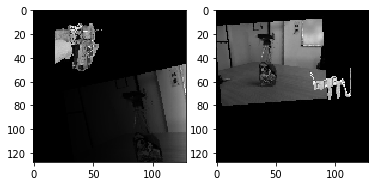

In [49]:
test_read = h5py.File(os.path.join(dest_parent_path, 'train_set.hdf5'), 'r')
test_read.keys()

i = 31000
imgs_A = test_read['train_A'][:,:,:]
imgs_B = test_read['train_B'][:,:,:]
print(imgs_A.shape)
print(imgs_B.shape)

img_A = imgs_A[i,:,:]
img_B = imgs_B['train_B'][i,:,:]
fig = plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(img_A)
fig.add_subplot(1,2,2)
plt.imshow(img_B)

test_read.close()

In [48]:
test_read = h5py.File(os.path.join(dest_parent_path, 'train_labels.hdf5'), 'r')
test_read.keys()
gt_A = test_read['train_A_labels'][:,:]
gt_B = test_read['train_B_labels'][:,:]
print(gt_A.shape)
print(gt_B.shape)
test_read.close()

(34643, 6)
(34643, 6)
